## US Patient Hospital Rating Vs. Population

In [5]:
import pandas as pd
import numpy as np
import os
%matplotlib inline
import matplotlib.pyplot as plt

### Download data from CMS and load data

In [6]:
id_2015 = next(os.walk('2015/'))[2]

In [7]:
df_year = pd.DataFrame()

for file in id_2015:
    f= pd.read_csv('2015/' + file, encoding = 'cp1252')
    f['year'] = f['Measure End Date'].astype(str).apply(lambda x: x[-4:])
    f = f[f['HCAHPS Question'] == 'Summary star rating']
    f = f[f['Patient Survey Star Rating'] !='Not Available']
    f['Patient Survey Star Rating'] = f['Patient Survey Star Rating'].astype(np.float32)
    #f = f.drop(columns=['Measure Start Date', 'Measure End Date', 'Address','County Name', 'Phone Number', 'HCAHPS Measure ID','Survey Response Rate Percent Footnote','Patient Survey Star Rating Footnote','HCAHPS Linear Mean Value','HCAHPS Answer Percent Footnote'], axis=1)
    df_year = pd.concat([df_year, f])

C:\Users\wyan\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\wyan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  # Remove the CWD from sys.path while we load stuff.


### Data Cleaning 

In [8]:
df = df_year.copy()
df = df.drop(columns=['Provider ID','Address','HCAHPS Measure ID','HCAHPS Answer Percent Footnote', 'Survey Response Rate Percent Footnote',
                    'Number of Completed Surveys Footnote','HCAHPS Linear Mean Value','Patient Survey Star Rating Footnote','Phone Number',
                      'Measure Start Date', 'Measure End Date','HCAHPS Question'], axis=1)


In [9]:
df.year = df.year.astype(np.str)
df1 = df.groupby(['year', 'State'], as_index=False).mean() #.sort_values(['Patient Survey Star Rating'],ascending=False)
y_2014 = df1[df1.year == '2014'].sort_values('Patient Survey Star Rating', ascending=False)
y_2015 = df1[df1.year == '2015'].sort_values('Patient Survey Star Rating', ascending=False)
y_2016 = df1[df1.year == '2016'].sort_values('Patient Survey Star Rating', ascending=False)
y_2017 = df1[df1.year == '2017'].sort_values('Patient Survey Star Rating', ascending=False)

In [10]:
dfnew=pd.merge(pd.merge(pd.merge(y_2014, y_2015, how='outer', on=['State']), y_2016, how='outer', on=['State']), y_2017, how='outer', on=['State'])

In [17]:
dfnew.columns=['year_x', 'State', 'Patient Survey Star Rating_x', 'ZIP Code_x',
       'year_y', 'Patient Survey Star Rating_y', 'ZIP Code_y', 'year_a',
       'Patient Survey Star Rating_a', 'ZIP Code_a', 'year_b',
       'Patient Survey Star Rating_b', 'ZIP Code_b']
dfp = dfnew.drop(columns=['ZIP Code_x','ZIP Code_y','ZIP Code_a','ZIP Code_b', 'year_x','year_b', 'year_y','year_a' ], axis=1)
dfp.rename(columns={'Patient Survey Star Rating_x': 'Rating_2014','Patient Survey Star Rating_y': 'Rating_2015', 
                    'Patient Survey Star Rating_a': 'Rating_2016', 'Patient Survey Star Rating_b': 'Rating_2017' }, inplace=True)      

In [12]:
population = pd.read_excel('nst-est2017-01.xlsx', skiprows=3)
population = population.iloc[5:, :].reset_index()
population.rename(columns={'Unnamed: 0': 'State'}, inplace=True)

In [13]:
population.State=population.State.astype(np.str).apply(lambda x: x.replace('.', ''))

In [14]:
states = {'OH': 'Ohio', 'KY': 'Kentucky', 'AS': 'American Samoa', 'NV': 'Nevada', 'WY': 'Wyoming', 'NA': 
          'National', 'AL': 'Alabama', 'MD': 'Maryland', 'AK': 'Alaska', 'UT': 'Utah', 'OR': 'Oregon', 
          'MT': 'Montana', 'IL': 'Illinois', 'TN': 'Tennessee', 'DC': 'District of Columbia', 'VT': 'Vermont', 
          'ID': 'Idaho', 'AR': 'Arkansas', 'ME': 'Maine', 'WA': 'Washington', 'HI': 'Hawaii', 'WI': 'Wisconsin', 
          'MI': 'Michigan', 'IN': 'Indiana', 'NJ': 'New Jersey', 'AZ': 'Arizona', 'GU': 'Guam', 'MS': 'Mississippi', 
          'PR': 'Puerto Rico', 'NC': 'North Carolina', 'TX': 'Texas', 'SD': 'South Dakota', 'MP': 'Northern Mariana Islands', 
          'IA': 'Iowa', 'MO': 'Missouri', 'CT': 'Connecticut', 'WV': 'West Virginia', 'SC': 'South Carolina', 
          'LA': 'Louisiana', 'KS': 'Kansas', 'NY': 'New York', 'NE': 'Nebraska', 'OK': 'Oklahoma', 'FL': 'Florida', 
          'CA': 'California', 'CO': 'Colorado', 'PA': 'Pennsylvania', 'DE': 'Delaware', 'NM': 'New Mexico', 
          'RI': 'Rhode Island', 'MN': 'Minnesota', 'VI': 'Virgin Islands', 'NH': 'New Hampshire', 'MA': 'Massachusetts', 
          'GA': 'Georgia', 'ND': 'North Dakota', 'VA': 'Virginia'}
states_abb = dict((v,k) for k,v in states.items())

In [15]:
population['State'] = population['State'].map(states_abb)

In [16]:
population.drop(columns=['Estimates Base','Census', 2010, 2011, 2012, 2013, 'index'],inplace=True)

In [18]:
dfpn = pd.merge(dfp, population, how='inner', on=['State'])

### Data Visulization 

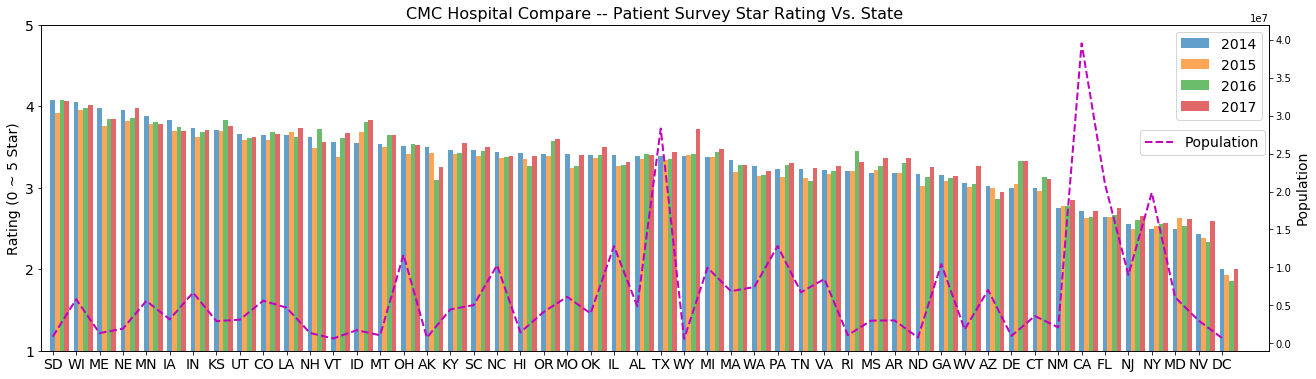

In [45]:
width = 0.2
pos = list(range(len(dfpn['State'])))
plt.figure(figsize=(22,6))
plt.bar(pos,dfpn['Rating_2014'], label='2014', width=0.2, alpha=0.7)
plt.bar([p + width for p in pos], dfpn['Rating_2015'], label='2015',width=0.2, alpha=0.7)
plt.bar([p + width*2 for p in pos], dfpn['Rating_2016'], label='2016',width=0.2, alpha=0.7)
plt.bar([p + width*3 for p in pos], dfpn['Rating_2017'], label='2017',width=0.2, alpha=0.7)
plt.axis([-0.5, 52, 1, 5], fontsize=14)
plt.yticks([1,2,3,4,5],fontsize=14)
ax = plt.gca()
ax.set_xticks([p + .5 * width for p in pos])
ax.set_xticklabels(dfpn['State'], fontsize=14)
ax.set_title('CMC Hospital Compare -- Patient Survey Star Rating Vs. State', fontsize=16)
ax.set_ylabel('Rating (0 ~ 5 Star)',fontsize=14)
plt.legend(fontsize=14)
ax2 = ax.twinx()
ax2.plot(dfpn['State'], dfpn[2017], 'm--', linewidth=2.0,label='Population')
ax2.set_ylabel('Population',fontsize=14)
ax2.set_ylim([-1e6, 4.2e7])
plt.legend(fontsize=14, loc=(0.895,0.6))
#locs, labels = plt.xticks()
#plt.setp(labels, rotation=45)
#plt.tight_layout()
plt.savefig('bar.png')

In [21]:
df2 = df.copy()
df2['ZIP Code'] = df2['ZIP Code'].astype(np.str)

In [22]:
cali = df2[df2['State'] == 'CA']
cali['ZIP Code']=cali['ZIP Code'].astype(np.str)
cali = cali.groupby(['year', 'City','ZIP Code'], as_index=False).mean()
cali_2016 = cali[cali['year']=='2016']

C:\Users\wyan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [23]:
gmap = pd.read_csv('free-zipcode-database.csv')

C:\Users\wyan\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [25]:
cal = gmap[gmap['State'] == 'CA']
cal = cal.drop(['RecordNumber', 'ZipCodeType', 'LocationType', 'TaxReturnsFiled','Zaxis', 
          'Notes', 'EstimatedPopulation', 'TotalWages', 'WorldRegion', 'Xaxis','Yaxis','Decommisioned'], axis=1)

In [26]:
cal = cal.rename(columns={'Zipcode': 'ZIP Code'})

In [31]:
cali_2016['ZIP Code']=cali_2016['ZIP Code'].astype(np.int64)
CA= pd.merge(cali_2016, cal, how='inner', on = ['ZIP Code'])

C:\Users\wyan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


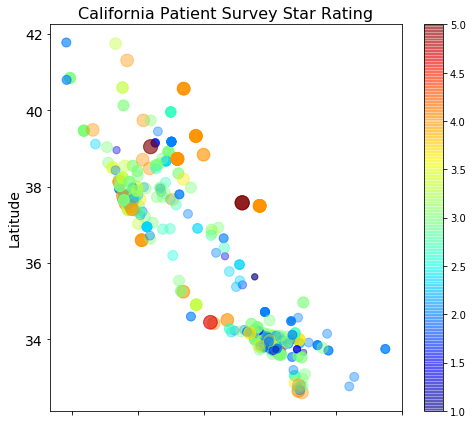

In [51]:
CA.plot(kind='scatter', x='Long', y='Lat', s = CA['Patient Survey Star Rating']*40, figsize=(7,6), fontsize=14,
        c= CA['Patient Survey Star Rating'],cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4)
ax = plt.gca()
ax.set_title('California Patient Survey Star Rating', fontsize=16)
ax.set_ylabel('Latitude',fontsize=14)
ax.set_xlabel('Longitude',fontsize=14)

#plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig('geomap.png')